**Note: the dataset can be downloaded from here: https://www.kaggle.com/datasets/bogomililiev2308/mura-hand-xray**

**1. Mounting of the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Moving to the destination folder. **NOTE: please create an ML folder on your drive, if you are trying to run this project as absolute paths were used in the code. Also, the dataset MURA-v1.1 folder needs to be unziped in the ML folder.**

In [ ]:
%cd /content/drive/My Drive/ML/

/content/drive/My Drive/ML


**Cloning of git hub repository.**

In [ ]:
!git clone https://github.com/pyaf/DenseNet-MURA-PyTorch.git

Cloning into 'DenseNet-MURA-PyTorch'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (75/75), 214.41 KiB | 6.50 MiB/s, done.


Checking the content of the destination folder to ensure the repository has been copied.

In [ ]:
!ls "/content/drive/My Drive/ML/"

A2.ipynb  DenseNet-MURA-PyTorch  MachineLearning.ipynb	xray


In [ ]:
!ls "/content/drive/My Drive/ML/DenseNet-MURA-PyTorch"

densenet.py  EDA  LICENSE  main.py  pipeline.py  README.md  train.py  utils.py


**Installing dependencies and rolling back to python 3.7, as the original project works with libraries from that version. NOTE: Please, make sure you select version 3.7 from the prompt(input the number of the 3.7 version and press Enter to confirm.**

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.7

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.16-1+focal1).
0 upgraded, 0 newly installed, 0 to remove a

In [ ]:
#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

!sudo update-alternatives --config python3

There are 3 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
  0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.7    1         manual mode
* 3            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.7 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!python --version

Python 3.7.16


In [ ]:
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (20.0.2-5ubuntu1.8).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!pip install wheel
!pip install coincurve
!pip install PyTorch
!pip install TorchVision
!pip install Numpy
!pip install Pandas

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/cmdoptions.py", line 19, in <module>
    from distutils.util import strtobool
ModuleNotFoundError: No module named 'distutils.util'
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._

**Data Analysis**

Import of libraries needed for DA.

In [ ]:
import os
import time
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from torchvision import transforms
from collections import defaultdict
from torchvision.datasets.folder import pil_loader
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from skimage import io, transform

pd.set_option('max_colwidth', 800)

%matplotlib inline

**Load Data**

There is one Category of X-rays in this subset of MURA - the Hand Subset

In [ ]:
%cd /content/drive/My Drive/ML/

/content/drive/My Drive/ML


Creation of dataframes.

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/train_labeled_studies.csv', names=['Path', 'Label'])
valid_df = pd.read_csv('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/valid/valid_labeled_studies.csv', names=['Path', 'Label'])

**Checking the DFs**

In [ ]:
train_df.shape, valid_df.shape

((2018, 2), (167, 2))

In [ ]:
train_df.head(3), valid_df.head(3)

(                                                    Path  Label
 0  MURA-v1.1/train/XR_HAND/patient09734/study1_positive/      1
 1  MURA-v1.1/train/XR_HAND/patient09735/study1_positive/      1
 2  MURA-v1.1/train/XR_HAND/patient07365/study1_positive/      1,
                                                     Path  Label
 0  MURA-v1.1/valid/XR_HAND/patient11497/study1_positive/      1
 1  MURA-v1.1/valid/XR_HAND/patient11498/study1_positive/      1
 2  MURA-v1.1/valid/XR_HAND/patient11499/study1_positive/      1)

We can see xray paths and their correspoinding labels, each radiographs has a label of 0 (normal) or 1 (abnormal)

**2. Data analysis**

In the given research paper, the MURA abnormality detection task involves classifying upper extremity radiograph studies into two categories: normal or abnormal. Each study consists of one or more images, and the desired outcome is a binary label (0 or 1) that indicates whether the study is normal or abnormal.

The model is designed to process one or more views of an upper extremity study. Using a 169-layer convolutional neural network, the model predicts the likelihood of abnormality for each view. To determine the overall probability of abnormality for the entire study, the average of the abnormality probabilities for all the images is calculated. If this overall probability exceeds 0.5, the model classifies the study as abnormal.

Therefore, the predictions are made at the study level, considering the predictions from all the views (images) within the study. This is achieved by calculating the average of the views (images) within a specific study.

In [ ]:
train_df.head(30)

,Path,Label
0,MURA-v1.1/train/XR_HAND/patient09734/study1_positive/,1
1,MURA-v1.1/train/XR_HAND/patient09735/study1_positive/,1
2,MURA-v1.1/train/XR_HAND/patient07365/study1_positive/,1
3,MURA-v1.1/train/XR_HAND/patient09736/study1_positive/,1
4,MURA-v1.1/train/XR_HAND/patient09737/study1_positive/,1
5,MURA-v1.1/train/XR_HAND/patient08710/study1_positive/,1
6,MURA-v1.1/train/XR_HAND/patient09738/study1_positive/,1
7,MURA-v1.1/train/XR_HAND/patient09739/study1_positive/,1
8,MURA-v1.1/train/XR_HAND/patient09740/study1_positive/,1
9,MURA-v1.1/train/XR_HAND/patient09740/study2_negative/,0


Analysing this dataframe, we can see that images are annotated based on whether their corresponding study is positive (normal, 0) or negative (abnormal, 1)

**Plotting of random X-rays from the training and validation sets.**

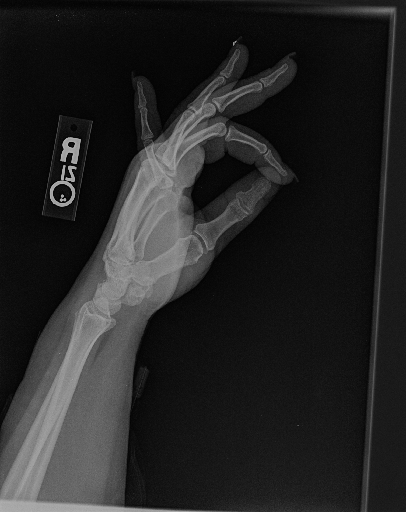

In [ ]:
from IPython.display import Image
Image("/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/XR_HAND/patient00218/study1_positive/image1.png")

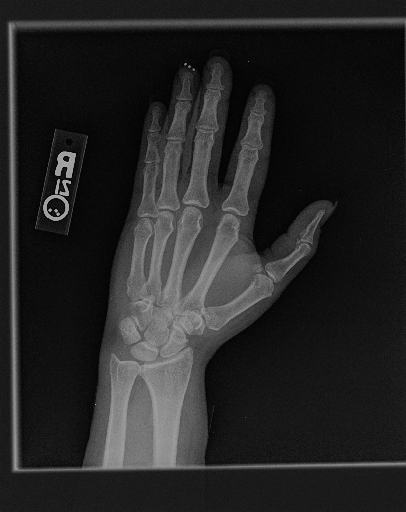

In [ ]:
Image("/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/XR_HAND/patient00565/study1_negative/image2.png")

It is visible that images vary in resolution and dimensions

In [ ]:
%cd /content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/
!ls

/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train


In [ ]:
%cd /content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/XR_HAND
!ls

/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/XR_HAND
patient00008  patient07596  patient10018  patient10407	patient10796
patient00050  patient07603  patient10019  patient10408	patient10797
patient00051  patient07608  patient10020  patient10409	patient10798
patient00084  patient07646  patient10021  patient10410	patient10799
patient00097  patient07662  patient10022  patient10411	patient10800
patient00126  patient07668  patient10023  patient10412	patient10801
patient00135  patient07687  patient10024  patient10413	patient10802
patient00141  patient07692  patient10025  patient10414	patient10803
patient00153  patient07718  patient10026  patient10415	patient10804
patient00218  patient07791  patient10027  patient10416	patient10805
patient00234  patient07792  patient10028  patient10417	patient10806
patient00256  patient07806  patient10029  patient10418	patient10807
patient00262  patient07826  patient10030  patient10419	patient10808
patient00276  patient07835  patient10031  p

The train dataset has one study type - Hand, each study type has studies on patients stored in folders named like patient001, patient002 etc..

In [ ]:
data_cat= ['train', 'valid']
study_types = list(os.walk('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/'))[0][1] # study types, same for train and valid sets
patients_count = {}  # to store all patients count for each study type, for train and valid sets
for phase in data_cat:
    patients_count[phase] = {}
    for study_type in study_types:
        patients = list(os.walk('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/%s/%s' %(phase, study_type)))[0][1] # patient folder names
        patients_count[phase][study_type] = len(patients)

In [ ]:
print(study_types)
print()
print(patients_count)

['XR_HAND']

{'train': {'XR_HAND': 1945}, 'valid': {'XR_HAND': 159}}


We can see that XR_HAND has 1945 patients in the training dataset and 159 in the validation one.

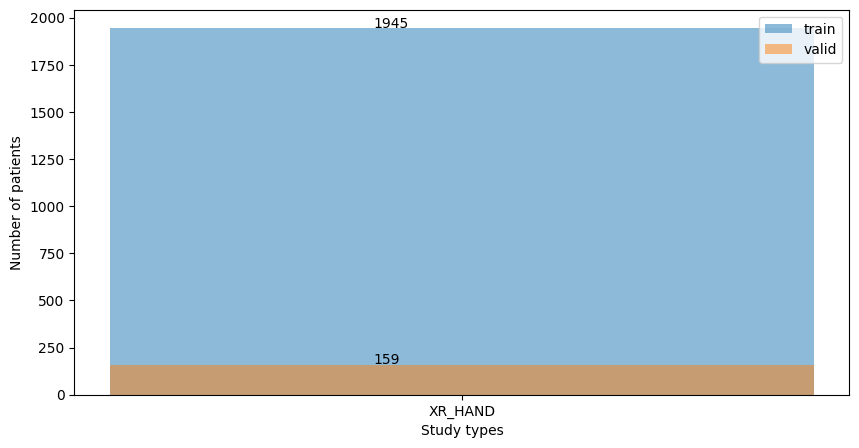

In [ ]:
# plot the patient counts per study type

fig, ax = plt.subplots(figsize=(10, 5))
for i, phase in enumerate(data_cat):
    counts = patients_count[phase].values()
    m = max(counts)
    for i, v in enumerate(counts):
        if v==m: ax.text(i-0.1, v+3, str(v))
        else: ax.text(i-0.1, v + 20, str(v))
    x_pos = np.arange(len(study_types))
    plt.bar(x_pos, counts, alpha=0.5)
    plt.xticks(x_pos, study_types)

plt.xlabel('Study types')
plt.ylabel('Number of patients')
plt.legend(['train', 'valid'])
plt.show()
fig.savefig('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/EDA/images/pcpst.jpg', bbox_inches='tight', pad_inches=0) # name=patient count per study type

**Study Count**

Patients might have multiple studies.
Let's have a look at such cases, NOTE here study count = number of patients which have same number of studies.

In [ ]:
# let's find out number of studies per study_type
study_count = {} # to store study counts for each study type
for study_type in study_types:
    BASE_DIR = '/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/%s/' % study_type
    study_count[study_type] = defaultdict(lambda:0) # to store study count for current study_type, initialised to 0 by default
    patients = list(os.walk(BASE_DIR))[0][1] # patient folder names
    for patient in patients:
        studies = os.listdir(BASE_DIR+patient)
        study_count[study_type][len(studies)] += 1

In [ ]:
study_count

{'XR_HAND': defaultdict(<function __main__.<lambda>()>,
             {1: 1875, 2: 67, 3: 3})}

XR_HAND has 1875 patients who have only one study, similarly, 67 patients have 2 studies, 3 patients have 3 studies.
Let's plot this data

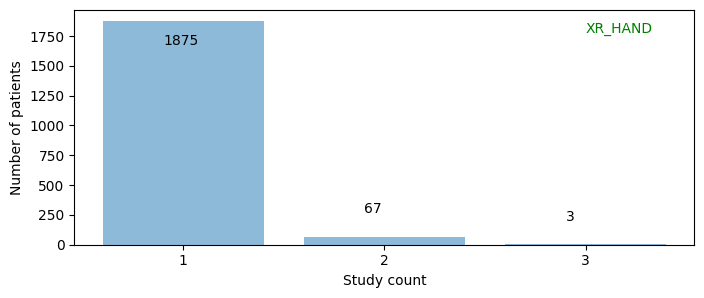

In [ ]:
# plot the study count vs number of patients per study type data
fig = plt.figure(figsize=(8, 25))
for i, study_type in enumerate(study_count):
    ax = fig.add_subplot(7, 1, i+1)
    study = study_count[study_type]
    # text in the plot
    m = max(study.values())
    for i, v in enumerate(study.values()):
        if v==m: ax.text(i-0.1, v - 200, str(v))
        else: ax.text(i-0.1, v + 200, str(v))
    ax.text(i, m - 100, study_type, color='green')
    # plot the bar chart
    x_pos = np.arange(len(study))
    plt.bar(x_pos, study.values(), align='center', alpha=0.5)
    plt.xticks(x_pos,  study.keys())
    plt.xlabel('Study count')
    plt.ylabel('Number of patients')
plt.show()
fig.savefig('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/EDA/images/pcpsc.jpg', bbox_inches='tight', pad_inches=0)

**Number of views per study**

It is important to note that each study may contain more than one X-ray image.

In [ ]:
# let's find out number of studies per study_type
view_count = {} # to store study counts for each study type, study count = number of patients which have similar number of studies
for study_type in study_types:
    BASE_DIR = '/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/MURA-v1.1/train/%s/' % study_type
    view_count[study_type] = defaultdict(lambda:0) # to store study count for current study_type, initialized to 0 by default
    patients = list(os.walk(BASE_DIR))[0][1] # patient folder names
    for patient in patients:
        studies = os.listdir(BASE_DIR + patient)
        for study in studies:
            views = os.listdir(BASE_DIR + patient + '/' + study)
            view_count[study_type][len(views)] += 1

In [ ]:
view_count

{'XR_HAND': defaultdict(<function __main__.<lambda>()>,
             {3: 1404, 2: 517, 1: 32, 4: 60, 5: 5})}

XR_HAND has as many as a maximum of 5 views in 5 studies, 4 views in 60 studies, 2 views in 517, 1404 studies with 3 views and 32 studies with 1 xray in it.

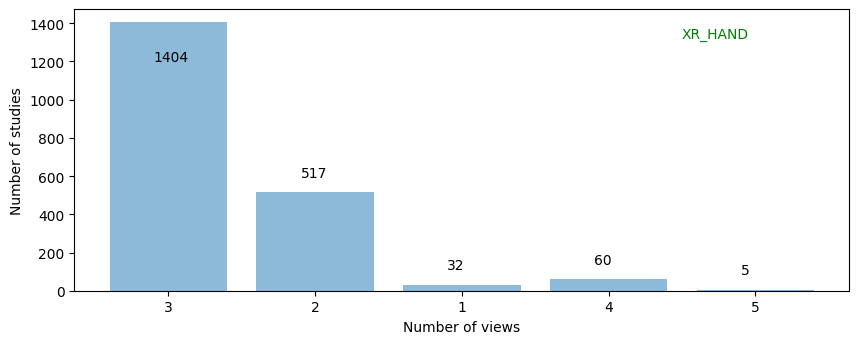

In [ ]:
# plot the view count vs number of studies per study type data
fig = plt.figure(figsize=(10, 30))
for i, view_type in enumerate(view_count):
    ax = fig.add_subplot(7, 1, i+1)
    view = view_count[view_type]
    # text in the plot
    m = max(view.values())
    for i, v in enumerate(view.values()):
        if v==m: ax.text(i-0.1, v - 200, str(v))
        else: ax.text(i-0.1, v + 80, str(v))
    ax.text(i - 0.5, m - 80, view_type, color='green')
    # plot the bar chart
    x_pos = np.arange(len(view))
    plt.bar(x_pos, view.values(), align='center', alpha=0.5)
    plt.xticks(x_pos,  view.keys())
    plt.xlabel('Number of views')
    plt.ylabel('Number of studies')
plt.show()
fig.savefig('/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/EDA/images/nsvc.jpg', bbox_inches='tight', pad_inches=0) # name=number of studies view count

Majority of the studies containt between 2 or 3 pictures.

**3. Training and Validation**

**Installation of torchnet library.**




In [ ]:
!pip install torchnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29728 sha256=3f017e9db27d798e786499d9d301e30e3246b4f81e6fa9676ed648959e95231d
  Stored in directory: /root/.cache/pip/wheels/f7/ae/94/9f5edd6871983f30967ad11d60ef434c3d1b007654de4c8065
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=4b1503324d652c2fde61ea340e0d31cc0f0d1421a5494b90f69830a86d2572f3
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built torchnet visdom


**Initialisation of the training and validation process**. NOTE: In order for the
 process to start and run normally please ensure that you go to /usr/local/lib/python3.10/dist-packages/torch/_tensor.py and in row number 970 you append return self.numpy() to return self.cpu().numpy() . Otherwise, there will be an error thrown.





In [ ]:
%cd /usr/local/lib/python3.10/dist-packages/torch/

/usr/local/lib/python3.10/dist-packages/torch


In [ ]:
%cd /content/drive/My Drive/ML/DenseNet-MURA-PyTorch/
!python main.py

/content/drive/My Drive/ML/DenseNet-MURA-PyTorch
100% 1945/1945 [00:05<00:00, 373.82it/s]
100% 159/159 [00:00<00:00, 413.91it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
tai: {'train': 1484, 'valid': 189}
tni: {'train': 4059, 'valid': 271} 

Wt0 train: tensor([0.2677], device='cuda:0')
Wt0 valid: tensor([0.4109], device='cuda:0')
Wt1 train: tensor([0.7323], device='cuda:0')
Wt1 valid: tensor([0.5891], device='cuda:0')
/content/drive/My Drive/ML/DenseNet-MURA-PyTorch/densenet.py:115: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaim